# Exercício 11

## Arthur Magalhães - 12629595

## Exercício

Examine como a escolha da arquitetura do modelo afeta a acurácia do conjunto de teste no caso da classificação dos dígitos do MNIST. Considere o exemplo de nossa rede densamente conectada. No exemplo, ela tem 512 neurônios em uma camada oculta.


### 0. Inicialize a semente aleatória com seu número USP

In [2]:
set.seed(12629595)

### 1. varie o número de neurônios em cada camada: use 32 e 64

##### Preparação das bibliotecas

In [3]:
#tempo de processamento do script
t00 = Sys.time()
# paralelização
library(doParallel)

Carregando pacotes exigidos: foreach

Carregando pacotes exigidos: iterators

Carregando pacotes exigidos: parallel



In [4]:
library(keras)
library(tensorflow)

cl <- makePSOCKcluster(5)
registerDoParallel(cl)

library(keras)
library(ggplot2)

# dados
mnist <- dataset_mnist()

In [5]:
train_images <- mnist$train$x
train_labels <- mnist$train$y
test_images <- mnist$test$x
test_labels <- mnist$test$y

# Algo sobre os dados:
dim(train_images)

[1] 60000    28    28

In [6]:
length(train_labels)

[1] 60000

In [7]:
dim(test_images)

[1] 10000    28    28

In [8]:
length(test_labels)


[1] 10000

In [9]:
# os pixels das imagens tem valores entre 0 e 255
summary(train_images[,14,14])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00   29.00   96.97  232.00  255.00 

In [10]:
# os targets são dígitos de 0 a 9
# exemplo:
test_labels[1:10]

[1] 7 2 1 0 4 1 4 9 5 9

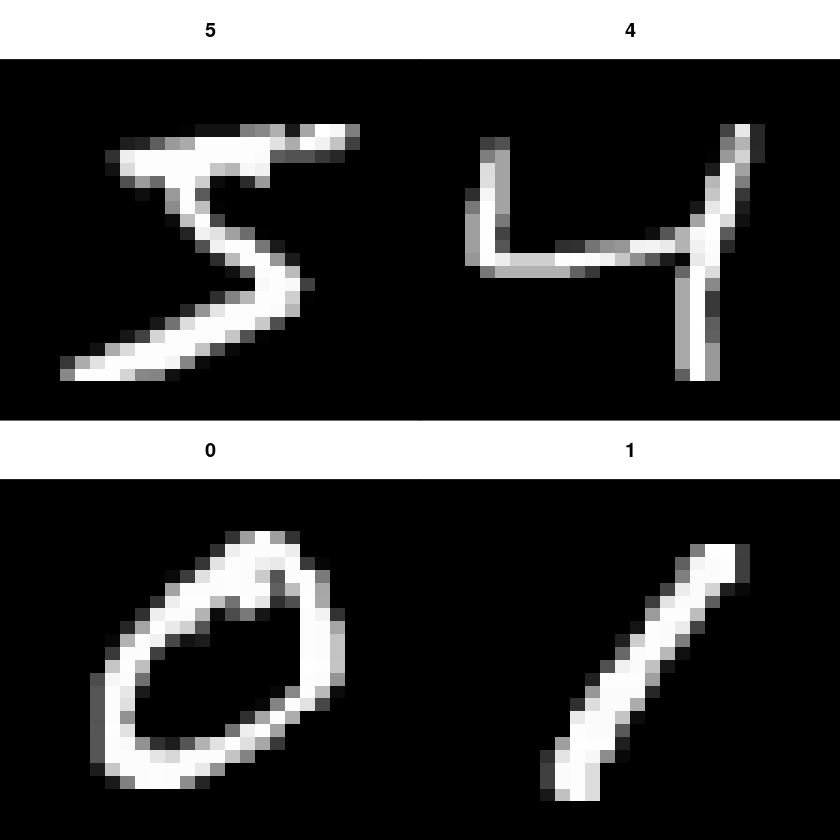

In [11]:
# visualização dos dígitos
par(mfcol=c(2,2))
par(mar=c(0, 0, 3, 0), xaxs='i', yaxs='i')
for (idx in 1:4) { 
    im <- train_images[idx,,]
    im <- t(apply(im, 2, rev)) 
    image(1:28, 1:28, im, col=gray((0:255)/255), 
          xaxt='n', main=paste(train_labels[idx]))
}


##### Variação dos neurônios entre os modelos

In [12]:
modelo_64 <- keras_model_sequential() %>%  
  layer_dense(units = 64, activation = "relu", input_shape = c(28 * 28)) %>% 
  layer_dense(units = 10, activation = "softmax")
  

modelo_32 <- keras_model_sequential() %>%  
  layer_dense(units = 32, activation = "relu", input_shape = c(28 * 28)) %>% 
  layer_dense(units = 10, activation = "softmax")


### 2. Varie o número de camadas ocultas (com 64 neurônios em cada uma): use de 1 a 3

In [13]:
modelo_64_1 <- keras_model_sequential() %>%  
  layer_dense(units = 64, activation = "relu", input_shape = c(28 * 28)) %>% 
  layer_dense(units = 10, activation = "softmax")

modelo_64_2 <- keras_model_sequential() %>%  
  layer_dense(units = 64, activation = "relu", input_shape = c(28 * 28)) %>% 
  layer_dense(units = 64, activation = "relu") %>% 
  layer_dense(units = 10, activation = "softmax")

modelo_64_3 <- keras_model_sequential() %>%  
  layer_dense(units = 64, activation = "relu", input_shape = c(28 * 28)) %>% 
  layer_dense(units = 64, activation = "relu") %>% 
  layer_dense(units = 64, activation = "relu") %>% 
  layer_dense(units = 10, activation = "softmax")

### 3. Varie a ativação no modelo com uma camada com 512 neurônios: compare ReLU com tanh

In [14]:
modelo_512_relu <- keras_model_sequential() %>%  
  layer_dense(units = 512, activation = "relu", input_shape = c(28 * 28)) %>% 
  layer_dense(units = 10, activation = "softmax")

modelo_512_tanh <- keras_model_sequential() %>%  
  layer_dense(units = 512, activation = "tanh", input_shape = c(28 * 28)) %>% 
  layer_dense(units = 10, activation = "softmax")

#### - Compilação de todos os modelos

In [15]:
modelo_64 %>% compile(
  optimizer = "rmsprop",                # variante turbinada da descida do gradiente
  loss = "categorical_crossentropy",    # classificação multi-classe
  metrics = c("accuracy")               # classificação
)

# um resumo do modelo:
summary(modelo_64)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_1 (Dense)                    (None, 64)                      50240       
 dense (Dense)                      (None, 10)                      650         
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
________________________________________________________________________________


In [16]:
modelo_32 %>% compile(
  optimizer = "rmsprop",                # variante turbinada da descida do gradiente
  loss = "categorical_crossentropy",    # classificação multi-classe
  metrics = c("accuracy")               # classificação
)

# um resumo do modelo:
summary(modelo_32)

Model: "sequential_1"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_3 (Dense)                    (None, 32)                      25120       
 dense_2 (Dense)                    (None, 10)                      330         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
________________________________________________________________________________


In [17]:
modelo_64_1 %>% compile(
  optimizer = "rmsprop",                # variante turbinada da descida do gradiente
  loss = "categorical_crossentropy",    # classificação multi-classe
  metrics = c("accuracy")               # classificação
)

# um resumo do modelo:
summary(modelo_64_1)

Model: "sequential_2"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_5 (Dense)                    (None, 64)                      50240       
 dense_4 (Dense)                    (None, 10)                      650         
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
________________________________________________________________________________


In [18]:
modelo_64_2 %>% compile(
  optimizer = "rmsprop",                # variante turbinada da descida do gradiente
  loss = "categorical_crossentropy",    # classificação multi-classe
  metrics = c("accuracy")               # classificação
)

# um resumo do modelo:
summary(modelo_64_2)

Model: "sequential_3"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_8 (Dense)                    (None, 64)                      50240       
 dense_7 (Dense)                    (None, 64)                      4160        
 dense_6 (Dense)                    (None, 10)                      650         
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
________________________________________________________________________________


In [19]:
modelo_64_3 %>% compile(
  optimizer = "rmsprop",                # variante turbinada da descida do gradiente
  loss = "categorical_crossentropy",    # classificação multi-classe
  metrics = c("accuracy")               # classificação
)

# um resumo do modelo:
summary(modelo_64_3)

Model: "sequential_4"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_12 (Dense)                   (None, 64)                      50240       
 dense_11 (Dense)                   (None, 64)                      4160        
 dense_10 (Dense)                   (None, 64)                      4160        
 dense_9 (Dense)                    (None, 10)                      650         
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
________________________________________________________________________________


In [20]:
modelo_512_relu %>% compile(
  optimizer = "rmsprop",                # variante turbinada da descida do gradiente
  loss = "categorical_crossentropy",    # classificação multi-classe
  metrics = c("accuracy")               # classificação
)

# um resumo do modelo:
summary(modelo_512_relu)

Model: "sequential_5"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_14 (Dense)                   (None, 512)                     401920      
 dense_13 (Dense)                   (None, 10)                      5130        
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
________________________________________________________________________________


In [21]:
modelo_512_tanh %>% compile(
  optimizer = "rmsprop",                # variante turbinada da descida do gradiente
  loss = "categorical_crossentropy",    # classificação multi-classe
  metrics = c("accuracy")               # classificação
)

# um resumo do modelo:
summary(modelo_512_tanh)

Model: "sequential_6"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_16 (Dense)                   (None, 512)                     401920      
 dense_15 (Dense)                   (None, 10)                      5130        
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
________________________________________________________________________________


#### - Pré-processamento dos dados

In [22]:
# muda o formato do arquivo train_images para o keras entender
train_images <- array_reshape(train_images, c(60000, 28 * 28)) 

dim(train_images)

[1] 60000   784

In [23]:
# agora cada imagem é representada por um vetor com 784 valores de pixels

# divide-se os valores dos pixels por 255 para ficarem entre 0 e 1
min(train_images)

max(train_images)

[1] 0

[1] 255

In [24]:
train_images <- train_images / 255  

# pré-processamento do conjunto de teste
test_images <- array_reshape(test_images, c(10000, 28 * 28)) 
test_images <- test_images / 255 

In [25]:
train_labels <- to_categorical(train_labels)
test_labels <- to_categorical(test_labels)

# as classes são 'hot-coded': todas 0, exceto uma (o target) que é 1:
head(train_labels)

0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0


#### - Rodando todos os modelos

Time difference of 17.6288 secs

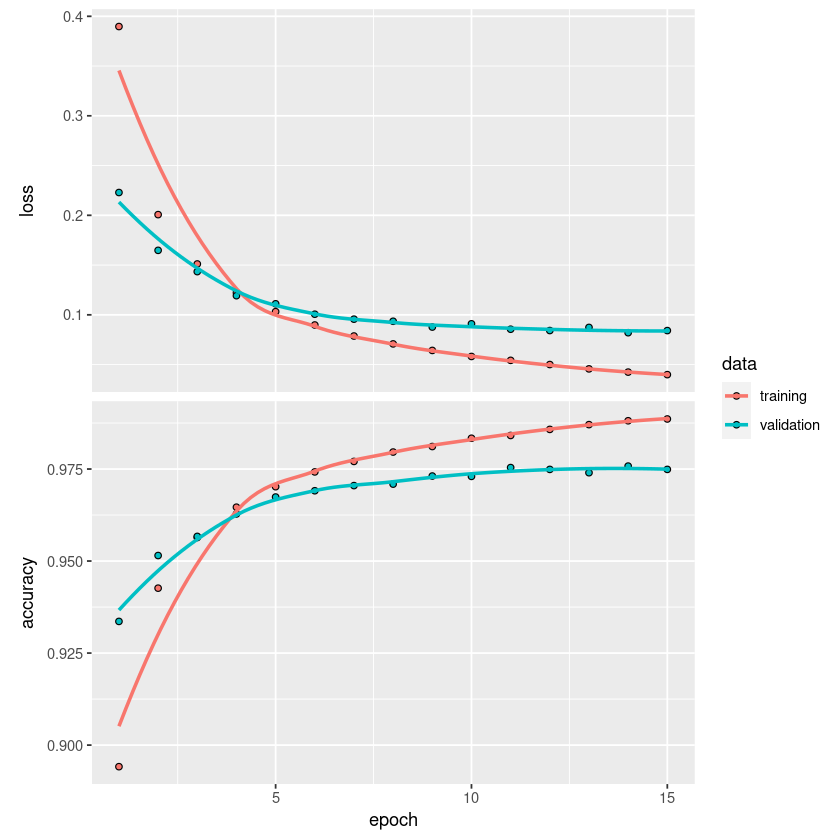

In [26]:
t0 = Sys.time()
historia <- modelo_64 %>% fit(train_images, train_labels, epochs = 15, batch_size = 128,verbose=0,validation_data = list(test_images,test_labels))
plot(historia)

Sys.time()-t0

Time difference of 12.44937 secs

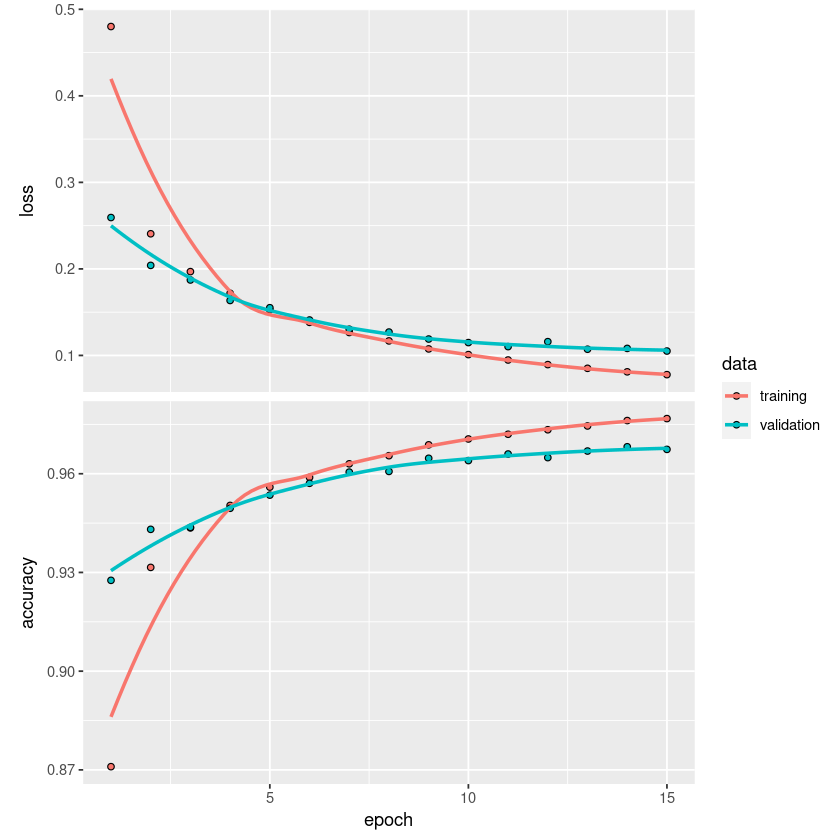

In [27]:
t0 = Sys.time()
historia <- modelo_32 %>% fit(train_images, train_labels, epochs = 15, batch_size = 128,verbose=0,validation_data = list(test_images,test_labels))
plot(historia)

Sys.time()-t0

Time difference of 15.37895 secs

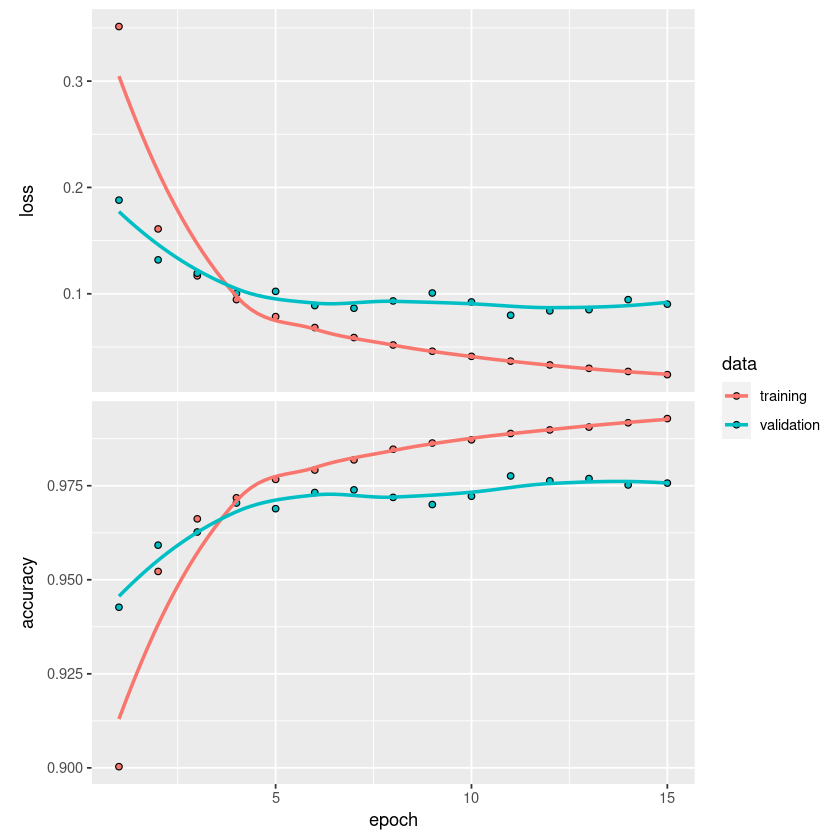

In [28]:
t0 = Sys.time()
historia <- modelo_64_2 %>% fit(train_images, train_labels, epochs = 15, batch_size = 128,verbose=0,validation_data = list(test_images,test_labels))
plot(historia)

Sys.time()-t0

Time difference of 15.99952 secs

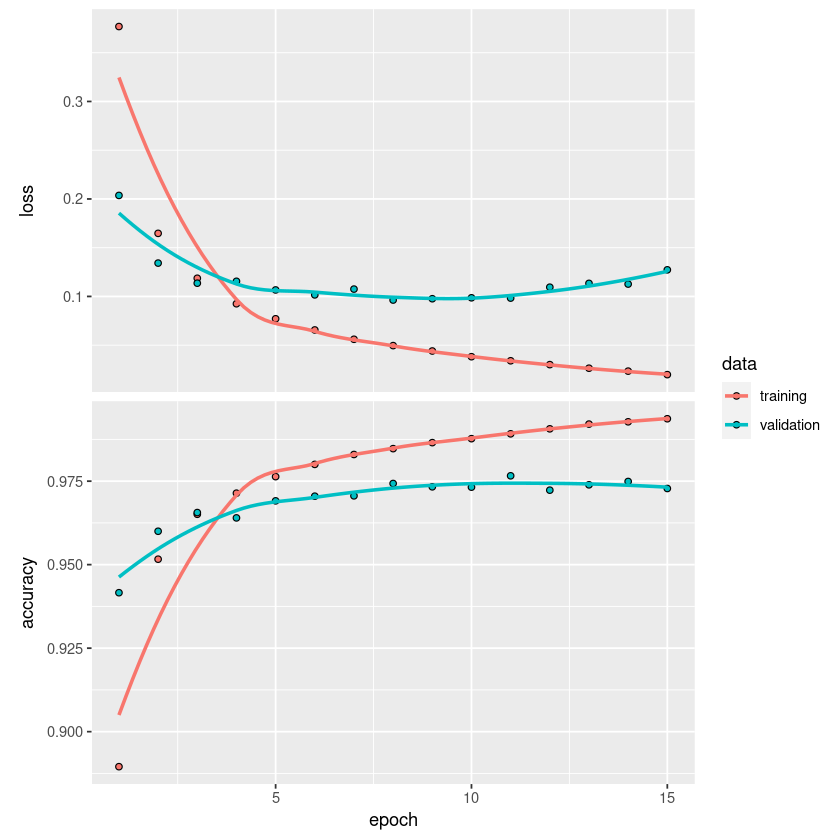

In [29]:
t0 = Sys.time()
historia <- modelo_64_3 %>% fit(train_images, train_labels, epochs = 15, batch_size = 128,verbose=0,validation_data = list(test_images,test_labels))
plot(historia)

Sys.time()-t0

Time difference of 45.75658 secs

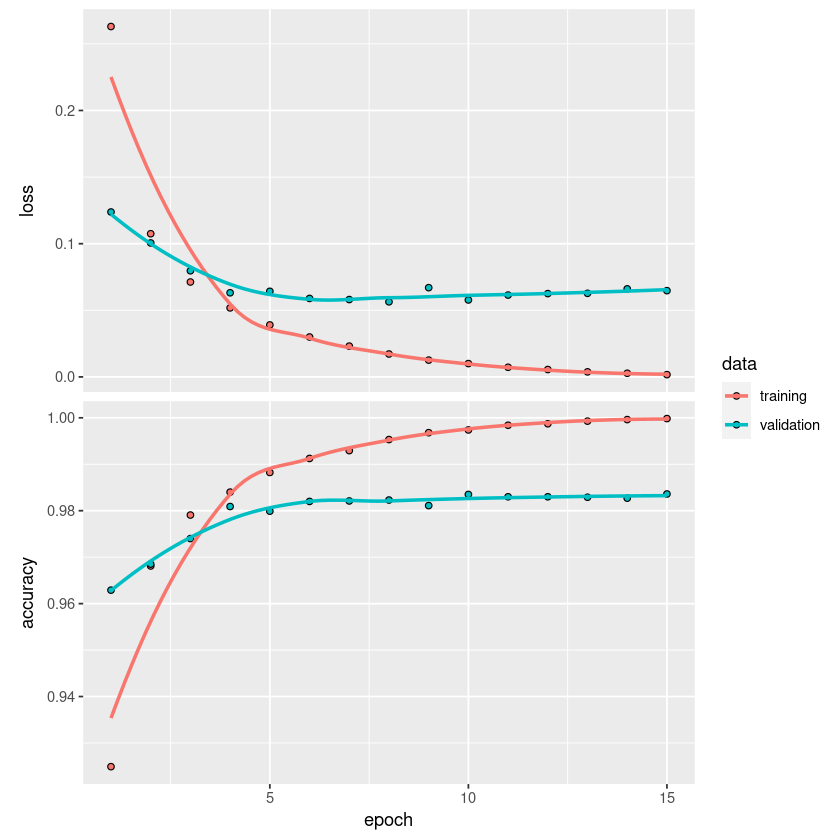

In [30]:
t0 = Sys.time()
historia <- modelo_512_relu %>% fit(train_images, train_labels, epochs = 15, batch_size = 128,verbose=0,validation_data = list(test_images,test_labels))
plot(historia)

Sys.time()-t0

Time difference of 44.5756 secs

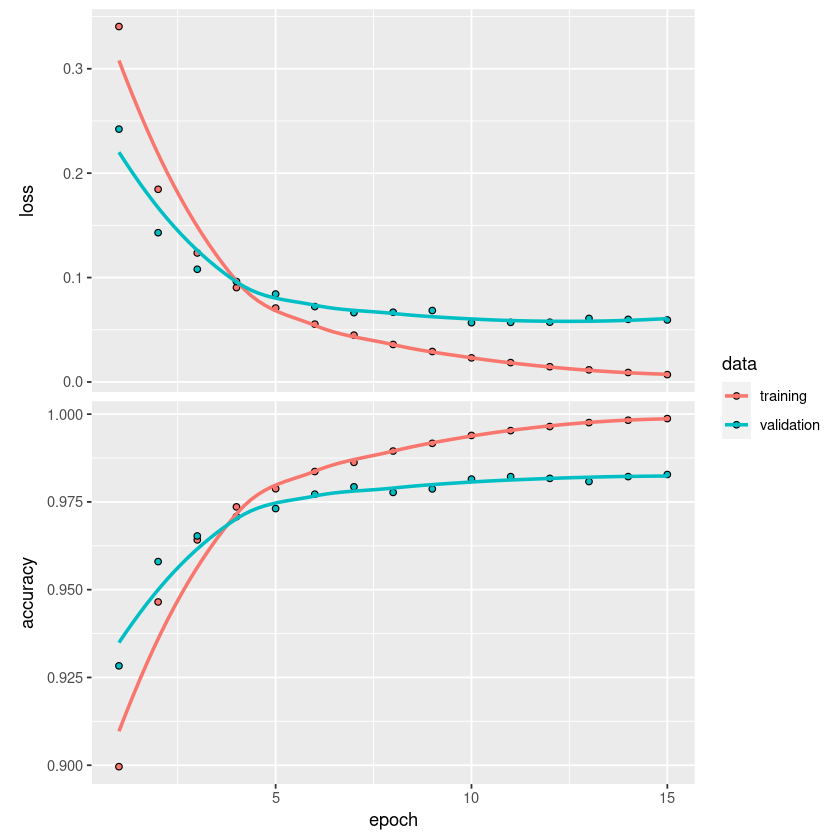

In [31]:
t0 = Sys.time()
historia <- modelo_512_tanh %>% fit(train_images, train_labels, epochs = 15, batch_size = 128,verbose=0,validation_data = list(test_images,test_labels))
plot(historia)

Sys.time()-t0

### - Conclusões & Discussão

Para este exercício utilizei os seguintes modelos:

 - 1: Modelo com 1 camada oculta de 64 neurônios
 - 2: Modelo com 1 camada oculta de 32 neurônios
 - 3: Modelo com 2 camada oculta de 64 neurônios
 - 4: Modelo com 3 camada oculta de 64 neurônios
 - 5: Modelo com 1 camada oculta de 512 neurônios com ativação ReLu
 - 6: Modelo com 1 camada oculta de 512 neurônios com ativaçao tanh
 
Para todos estes modelos processei os dados e obtive gráficos que mostram a acurácia do mesmo. Para todos utilizei um número de 15 épocas, que se mostrou favorável para encontrar o valor ótimo e  sem overfitting.

Agora, nos baseando na interseção gráfica entre a acurácia do conjunto de treino com o conjunto de validação, podemos concluir alguns pontos sobre o desempenho da acurácia dos modelos utilizados:

- Comparando os modelos 1 e 2, vemos que o modelo de 64 neurônios na camada oculta obteve acurácia superior que o modelo com 32.
- Comparando os modelos 1,3 e 4, vemos que o modelo com duas camadas ocultas obtém uma acurácia maior que os outros.
- Comparando os modelos 5 e 6, vemos que o modelo com ativação ReLu obtém um desempenho maior que o com tanh.

Por fim, temos que o modelo com melhor acurácia dentre os apresentados foi o 5, com uma camada oculta de 512 neurônios e ativação ReLu, mostrando um melhor desempenho de modelos mais densos.
 